# Project 3
## Nick Shinn and Brian Lee

## Part 1:

### Excercise 1

In [1]:
%%capture
import pip
def install(package):
   pip.main(['install', package]) 

install('ggplot')
install('sklearn')
install('statsmodels')

In [2]:
import pandas as pd, numpy as np, sklearn as skl
import statsmodels.api as sm, statsmodels.formula.api as smf
import requests, re, matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import *
from ggplot import *
from sklearn import svm, linear_model
from sklearn.model_selection import cross_val_score
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier
style.use("ggplot")


# Retrieves data from https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


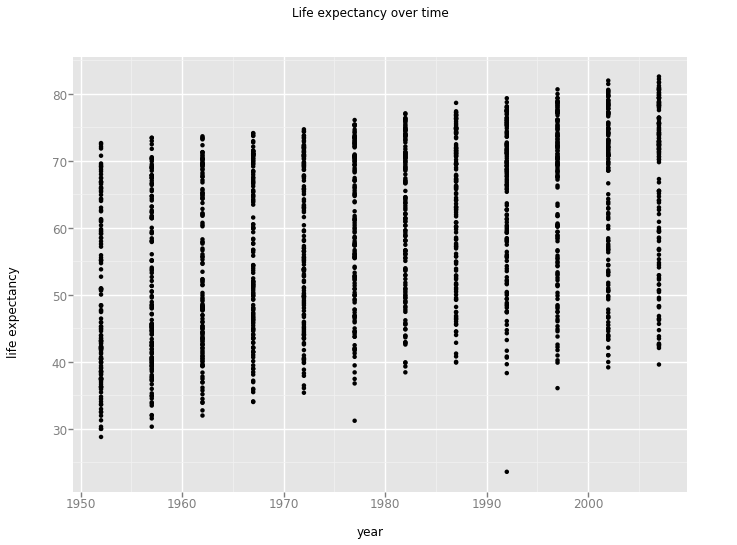

<ggplot: (8737503649102)>

In [3]:
## Utilizes ggplot to create a scatter plot of life expectancies over time for each country
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_point() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

### Question 1 

Based on the scatter plot , there seems to be a general trend of increasing life expectancy over the years. The increase in life expectancy appears to be linear.

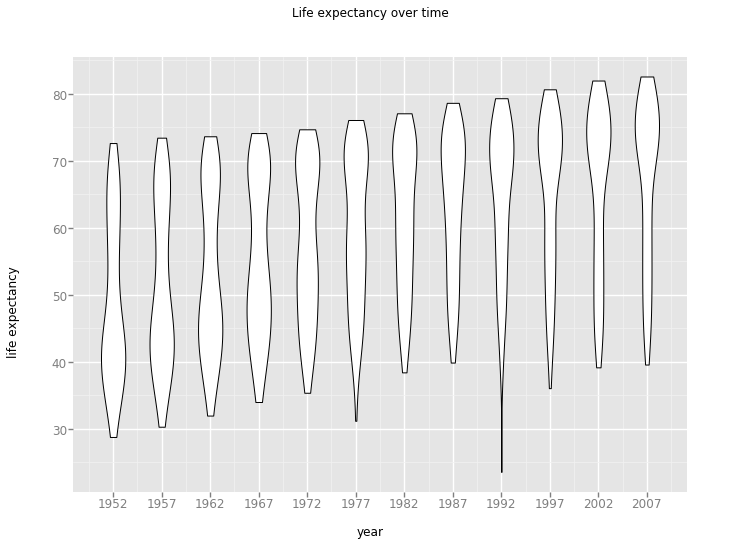

<ggplot: (-9223363299404796693)>

In [4]:
## Prints the violin plot of life expectancy over the years (taken from project spec)
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

### Question 2

The distributions of life expectancy over the years differed greatly. In 1952 and 1957, the distributions were highly skewed right, meaning that many of the life expectancies were below the median around 40-45 years. Beginning in 1962, the distributions began to appear bimodal, meaning that two modes began to appear. One mode lying around 40-50 years and the upper mode lying around 65-70 years. Following 1977 the distributions appeared to be less bimodal and more skewed left, so more of the life expectancies were beginning to appear around the previous upper mode, which is around 70 years. Towards the year 2007, most of the distributions were skewed left with the mode continually increasing. Overall the median of the distributions grew from around 50 years to 60 years.

### Question 3

If a relationship between year and life expectancy was tested against a linear regression model, I would choose to reject the null hypothesis of no relationship. If the year was treated as a continuous variable, there would exist a positive correlation between the life expectancy and year variables.

### Question 4

A violin plot of the residuals from the previous question would have the distributions from every year centered around the center of the plot. This is because the center of the plot indicates the predicted variable based on the linear regression model. The first few distributions would have most of the residuals lie below the center line (which means the "violin" would be thicker below the center. The next few distributions that are slightly bimodal will appear evenly spread around the center. The last plots that are skewed left will have many of the residuals lay above the center (so the "violin" will be thicker above the center).

### Question 5

According to the assumptions of the linear regression model, the plot of the residuals should look randomized and spread and appear to have no pattern. This would indicate a strong fit against the sample data. When plotted as a violin plot, the distributions should not appear skewed in any direction, but more unimodal around the center.

### Exercise 2

In [5]:
## Uses the sklearn linear regression object to fit a regression coefficient and y intercept
regr = skl.linear_model.LinearRegression()
regr.fit(data.year.values.reshape(-1,1), data.lifeExp)
r_squared = regr.score(data.year.values.reshape(-1,1), data.lifeExp)
print('Slope: %f' % regr.coef_)
print('Intercept: %.2f' % regr.intercept_)
print('R-Squared: %.2f' % r_squared)

Slope: 0.325904
Intercept: -585.65
R-Squared: 0.19


### Question 6

Based on the fitted linear regression model, the life expectancy increases by 0.326 per year on average (among all the observed continents).

### Question 7

Based on the linear regression model, I would reject the null hypothesis of no relationship because of the r squared coefficient. The coefficent of determination is interpreted as the proportion of the variance in the life expectancy variable that is predictable from the year variable, so an r squared value of 0.19 indicates that there is a weak positive correlation between year and life expectancy.

### Exercise 3

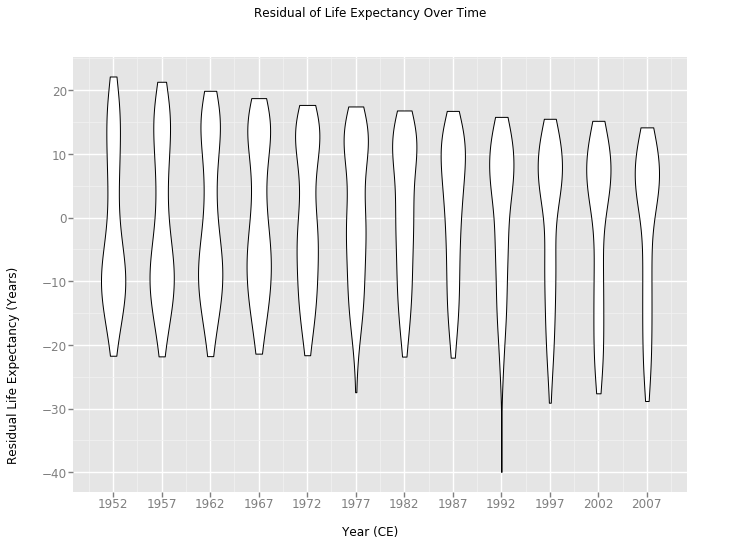

<ggplot: (8737449963584)>

In [6]:
## Calculate predictions and residuals for life expectancy
domain = data.year.values.reshape(-1,1)
predictions = regr.predict(domain)
data = data.assign(pred_LE = predictions)
data = data.assign(resid_LE = data.lifeExp - data.pred_LE)

## Print the violin plot of life expectancy residuals by year
ggplot(aes(x='year', y='resid_LE'), data=data) +\
    geom_violin() +\
    labs(title='Residual of Life Expectancy Over Time',
         x = 'Year (CE)',
         y = 'Residual Life Expectancy (Years)')

### Question 8

The violin plot from the previous exercise matched my expectations from question 4 where the distribution of residuals shifted from right to left across the years, with most of the residuals laying around the center.

### Exercise 4

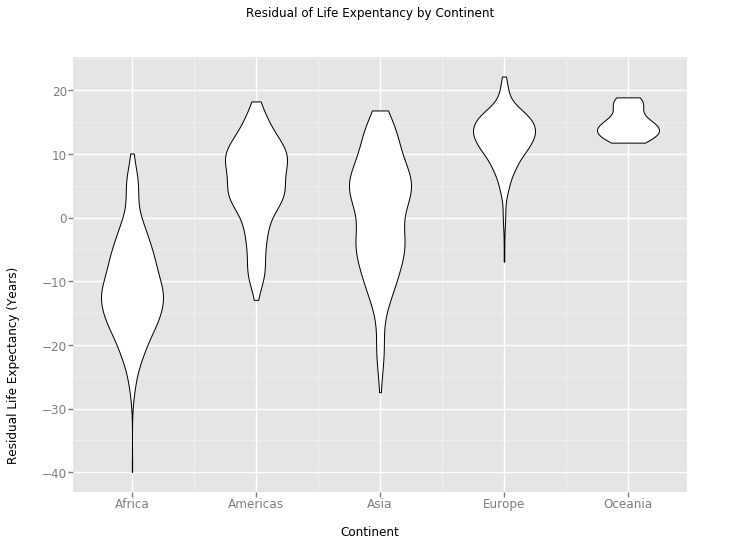

<ggplot: (-9223363299410708294)>

In [7]:
## Print the violin plot of life expectancy residuals grouped by continent
ggplot(aes(x='continent', y='resid_LE'), data=data) +\
    geom_violin() +\
    labs(title='Residual of Life Expentancy by Continent',
         x = 'Continent',
         y = 'Residual Life Expectancy (Years)')

### Question 9

Based on the violin plots, a clear dependence can be observed between model residual and continent. The residuals for the life expectancies in Africa are around 10 years lower than the residuals in asia. Similarly, the model redisuals in the Americas, Europe, and Oceania are significantly higher, respectively in that order. Because of this, an interaction term should be introduced in order to properly fit a linear model based on the difference in continents.

### Exercise 5

/opt/conda/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


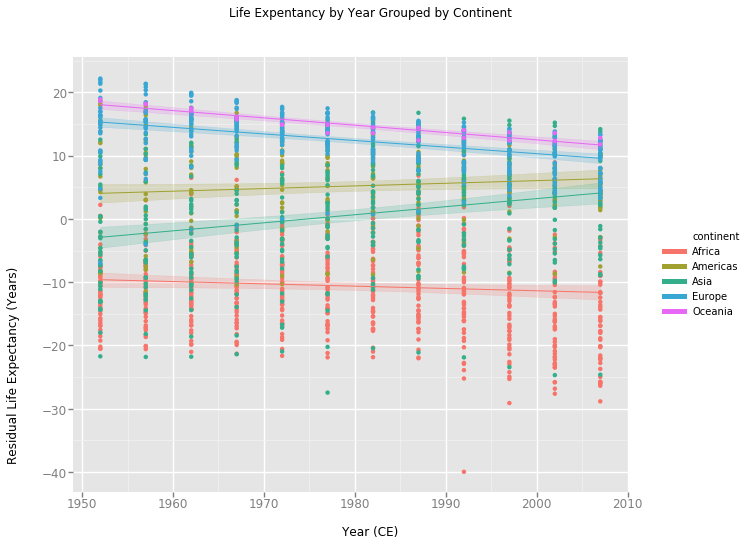

<ggplot: (-9223363299406443846)>

In [8]:
## Prints ONE scatter plot of life expectacy by year, but grouped by continent
ggplot(aes(x='year', y='resid_LE', group='continent', color='continent'), data=data) +\
    geom_point() +\
    stat_smooth(method='lm') +\
    labs(title='Life Expentancy by Year Grouped by Continent',
         x = 'Year (CE)',
         y = 'Residual Life Expectancy (Years)')

### Question 10

Based on the plot of life expectancies over the years grouped by their continents, I can observe that there are multiple linear regression lines with varying slopes. Because the slope of the regression line varies by continent over the years, an interaction term should be included for both continent and year.

### Exercise 6

In [9]:
# Fit a linear regression model for life expectancy including a term for an interaction between continent and year.
interaction_model = smf.ols(formula= 'lifeExp ~ year * continent', data= data).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        04:58:33   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Question 11

Looking at the OLS Regression results, I can see that most of the parameters in the model are close to 0. The only 2 parameters that differ significantly are the continent[T.Oceania] and year:continent[T.Oceania] variables which are 0.287 and 0.36 respectively.  

### Question 12

In [10]:
#Extracts relevant metrics from regression model params
print('Americas: %.3f' % interaction_model.params['year:continent[T.Americas]'])
print('Asia: %.3f' % interaction_model.params['year:continent[T.Asia]'])
print('Europe: %.3f' % interaction_model.params['year:continent[T.Europe]'])
print('Oceania: %.3f' % interaction_model.params['year:continent[T.Oceania]'])
avg = (interaction_model.params['year:continent[T.Americas]']+interaction_model.params['year:continent[T.Asia]']
       +interaction_model.params['year:continent[T.Europe]']+interaction_model.params['year:continent[T.Oceania]'])/4
print('Average life expectancy increase: %.3f' % avg)

Americas: 0.078
Asia: 0.164
Europe: -0.068
Oceania: -0.079
Average life expectancy increase: 0.024


### Exercise 7

In [11]:
# Calculates the ANOVA for the model with the interaction term
anova_table_1 = sm.stats.anova_lm(interaction_model, typ=2)
print('ANOVA With Interaction Term')
print(anova_table_1)
print('\n')

# Calculates the ANOVA for the model without the interaction term
linear_regr = smf.ols(formula= 'lifeExp ~ year', data= data).fit()
anova_table_1 = sm.stats.anova_lm(linear_regr, typ=2)
print('ANOVA Without Interaction Term')
print(anova_table_1)

ANOVA With Interaction Term
                       sum_sq      df            F         PR(>F)
continent       139343.165923     4.0   675.811593   0.000000e+00
year             53919.184217     1.0  1046.027900  4.048499e-179
year:continent    3566.089198     4.0    17.295462   6.463379e-14
Residual         87319.944414  1694.0          NaN            NaN


ANOVA Without Interaction Term
                 sum_sq      df           F        PR(>F)
year       53919.184217     1.0  398.604746  7.546795e-80
Residual  230229.199536  1702.0         NaN           NaN


### F-Test



H0: The regression model with the interaction term is not significantly better than the normal regression model.
<br>
Ha: The regression model with the interaction term is siginificantly better than the normal regression model.

F-ratio statistic:
    $$F=\frac{\frac{SS1-SS2}{DF1-DF2}}{\frac{SS2}{DF2}}$$
    
using the values from the ANOVA gives:
    $F=\frac{230229.2-87319.9}{1702.0-1694.0}/\frac{87319.9}{1694.0}=346.6$
    
The F-ratio is well above 1, which indicates that the linear regression model with the interaction term is a better fit for the data, so we have sufficient evidence to reject the null hypothesis.

### Question 13

The interaction model is significantly better than the year-only model beacuse the sum of squares for the year-only model is much larger than the sum of squares for the interaction model. This statistic measures how well the linear regression model fits in the data, and the smaller the regression values are the better the fit. Looking at the interaction model in context, it is clear to see that the slope of the life expectancy varies by continent. Generalizing the growth/decline of the life expectancy by using one predictor variable (year) will lead to an inaccurate model of life expectancy

### Exercise 8

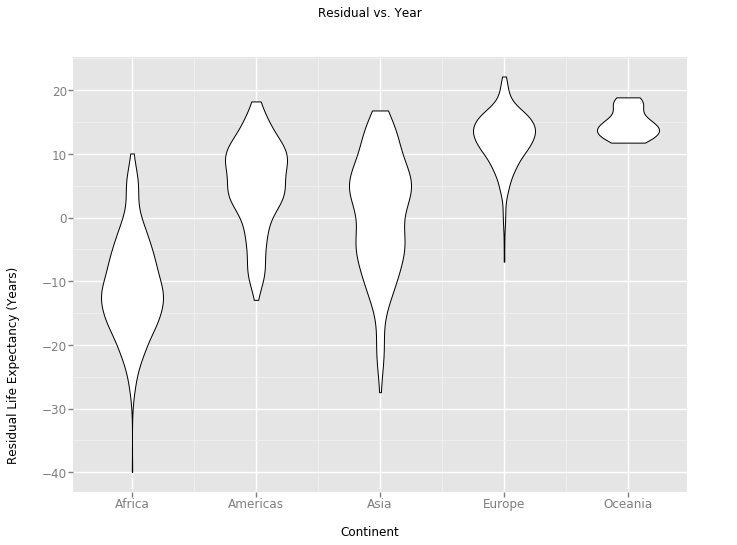

<ggplot: (8737443166966)>

In [12]:
## Note: Ambiguous project spec, so this question follows piazza post @334 modelling the "dumb" and "smart" residuals

## Pass in data set for model prediction data
domain = data.year.values.reshape(-1,1)
predictions = linear_regr.predict(data)
data = data.assign(pred_dumb = predictions)
data = data.assign(resid_dumb = data.lifeExp - data.pred_dumb)

## Print the violin plot of life expectancy residuals by year using the "Dumb" model
ggplot(aes(x='continent', y='resid_dumb'), data=data) +\
    geom_violin() +\
    labs(title='Residual vs. Year',
         x = 'Continent',
         y = 'Residual Life Expectancy (Years)')

The violin plot of the residuals using the "dumb" model are not symmetric over the center, so it doesn't fit well

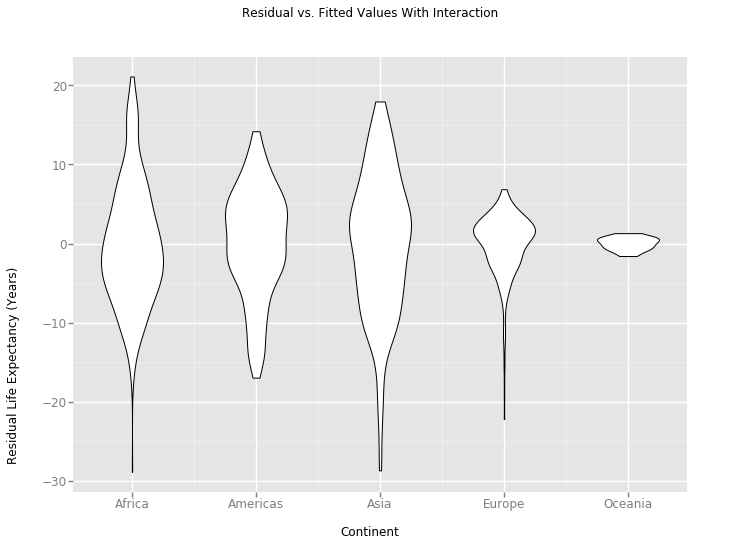

<ggplot: (-9223363299411730088)>

In [13]:
## Calculate predictions and residuals for life expectancy using the interaction model
## Pass in data set for model prediction data
predictions = interaction_model.predict(data)
data = data.assign(pred_smart = predictions)
data = data.assign(resid_smart = data.lifeExp - data.pred_smart)

## Print the violin plot of life expectancy residuals by year using the "Smart" Model
ggplot(aes(x='continent', y='resid_smart'), data=data) +\
    geom_violin() +\
    labs(title='Residual vs. Fitted Values With Interaction',
         x = 'Continent',
         y = 'Residual Life Expectancy (Years)')

The violin plot of the residuals using the "smart" model shows all of the distributions centered over the center. This indicates a siginificantly better fit than the "dumb" model.

## Part 2:

In [14]:
# simulate data for linear regression
import sklearn.datasets as skl_ds
data_x, data_y = skl_ds.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_data_x, dump_y = skl_ds.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_data_y = [0 if i > 0 else 1 for i in dump_y]

### Problem 1

In [15]:
# Implementation in lecture 20 is already for multiple parameters
# Below is the batch gradient descent algorithm

# Training data of (X, Y), T time steps, alpha steps
def grad_descent(X, y, T, alpha):
    m, n = X.shape          # m = number of examples, n = number of features
    theta = np.zeros(n)     # initialize parameters
    f = np.zeros(T)         # tracks loss over time
    for i in range(T):
        # keep track of loss for current parameter vector theta
        f[i] = 0.5 * np.linalg.norm(np.dot(X,theta) - y)**2
        # compute the steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # decrement the gradient accordingly
        theta = theta - alpha*g
    return theta, f
theta, f = grad_descent(data_x, data_y, 20, 0.1)

### Problem 2

Cost function is based on the least squares regression
$$J(\theta) = \frac{1}{2} \cdot(h(\mathbf{x})-\mathbf{y})^2$$
where h(theta) is our hypothesis function
$$h(\mathbf{x}) = \theta_0+\theta_1 x_1 +\theta_2 x_2+...$$

So our update from one iteration to the next is equal to
$$\alpha\frac{\delta}{\delta\theta}J(\theta)$$
where alpha is our learning rate

So our update function is
$$\theta_j := \theta_j-\alpha\frac{\delta}{\delta\theta_j}J(\theta)$$

Using our previous cost function we find our update
$$\frac{\delta}{\delta\theta_j}J(\theta) = \frac{\delta}{\delta\theta_j}\frac{1}{2}(h(\mathbf{x})-\mathbf{y})^2$$
$$ = 2\cdot\frac{1}{2}(h(\mathbf{x})-\mathbf{y}) \cdot \frac{\delta}{\delta\theta_j}\frac{1}{2}(h(\mathbf{x})-\mathbf{y})$$
$$ = (h(\mathbf{x})-\mathbf{y}) \cdot \frac{\delta}{\delta\theta_j}\sum_{i=0}^{n}(\theta_ix_i-\mathbf{y_i})$$
$$ = (h(\mathbf{x})-\mathbf{y})\mathbf{x_j}$$

So our update for a single sample is
$$\theta_j := \theta_j-\alpha(h(\mathbf{x})-\mathbf{y})\mathbf{x_j}$$

This can be abstracted to a batch update by summing the cost across all samples

### Problem 3

In [16]:
# This is a batch estimation implementation of gradient descent using log-odds 
# Training data of (X, Y), T time steps, alpha steps
def log_grad_descent(X, y, T, alpha):
    m, n = X.shape          # m = number of examples, n = number of features
    theta = np.zeros(n)     # initialize parameters
    f = np.zeros(T)         # tracks loss over time
    for i in range(T):
        conv = X.dot(theta)
        # keep track of loss for current parameter vector theta
        power = conv * y * -1
        f[i] = np.sum(np.log(1 + np.exp(power)))
        # compute the steepest ascent at f(theta)
        p = np.exp(conv)/(1 + np.exp(conv))
        g = np.dot(p - y, X)
        # decrement the gradient accordingly
        theta = theta - alpha*g
    return theta, f
theta2, f2 = log_grad_descent(log_data_x, log_data_y, 20, 0.1)
#print(log_grad_descent(log_data_x, log_data_y, 20, 0.1))

### Problem 4

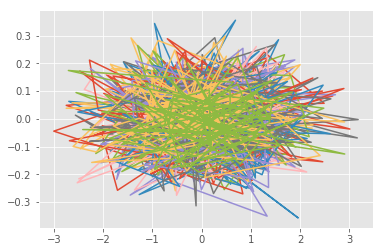

In [17]:
%matplotlib inline
#simulate data for linear regression

gen_data_x, gen_data_y = skl.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = skl.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

#a really bad estimator
#returns random vector as estimated parameters
dummy = np.ndarray([100, 20])
for index, row in enumerate(dummy):
    dummy[index] = np.random.normal(0, .1, 20)
plt.plot(gen_data_x, dummy)

### Try it out!

In [18]:
## The data comes from the Statlib ml library from CMU and it describes different classifications of glass types. 
## The goal is to predict the refractive index of the glass based on different predictors such as the composition of the glass
## by different elements (measured as weight percent in corresponding oxide)

# Tidy data using python array manipulation and pandas functions
ml_data = requests.get("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
ml_list = [i.split() for i in ml_data.text.split('\n')]
glass_list = [i[0].split(',') for i in ml_list if len(i) != 0]
glass_df = pd.DataFrame(glass_list, columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Be','Fe','Type'])
RI = pd.DataFrame(glass_df['RI'])
glass_df = glass_df.drop('Id', 1)
glass_df = glass_df.drop('Type', 1)
RI = RI.as_matrix().flatten()
RI = RI.astype(np.float)
glass_df = glass_df.as_matrix().flatten().reshape(214,9)
glass_df = glass_df.astype(np.float)
mean = np.mean(RI)

## Use 1 for above the mean and 0 for below the mean
RI_labels = np.array([1 if x >= mean else 0 for x in RI])

## Randomizes positions of the labels
rand_permute = np.random.permutation(len(RI_labels))
glass_df = glass_df[rand_permute, :]
RI_labels = RI_labels[rand_permute]

# Set variables for algorithms
X = glass_df
y = RI_labels

In [19]:
#1 Prediction performance using Linear SVM Classifier 

clfLSVM = svm.SVC(kernel='linear', C = 1.0)
scoresLSVM = cross_val_score(clfLSVM, X, y, cv=10)
print("The average error for the Linear SVM Classifier is " + str(scoresLSVM.mean()))
print("The standard error for the Linear SVM Classifier is " + str(scoresLSVM.std()  / np.sqrt(10)))

The average error for the Linear SVM Classifier is 0.903636363636
The standard error for the Linear SVM Classifier is 0.0242558674848


In [20]:
#2 Prediction performance using Random Forest Classifier 

clfRF = RandomForestClassifier(n_jobs=-1)
clfRFfit = clfRF.fit(X, y)
scoresRF = cross_val_score(clfRF, X, y, cv=10)
print("The average error for the Random Forest Classifier is " + str(scoresRF.mean()))
print("The standard error for the Random Forest Classifier is " + str(scoresRF.std() / np.sqrt(10)))

The average error for the Random Forest Classifier is 0.990909090909
The standard error for the Random Forest Classifier is 0.00862439361864


In [21]:
# Uses Gradient Descent algorithm to calculate the log accuracy of the predictor

log_accuracy = np.zeros(10)
valid_size = (int) (len(y) / 10)
for i in range(0, 10):
    indices = np.ones(len(y), dtype=bool)

    #get indices for the different folds
    indices[i*valid_size:(i+1)*valid_size] = 0
    Xtrain = X[indices,:]
    Ytrain = y[indices]
    Xtest = X[np.logical_not(indices),:]
    Ytest = y[np.logical_not(indices)]
    
    #train model
    theta, _ = log_grad_descent(Xtrain, Ytrain, 20, 0.1)
    
    #test model
    Ypred = Xtest.dot(theta)
    Ypred_label = np.array([1 if i>0 else 0 for i in Ypred])    
    num_errors = np.sum(Ypred_label == Ytest)
    log_accuracy[i] = 1 - num_errors / len(Ytest)

print("The average error for the logistic gradient descent algorithm is " + str(log_accuracy.mean()))
print("The standard error for the logistic gradient descent algorithm is " + str(log_accuracy.std() / np.sqrt(10)))

The average error for the logistic gradient descent algorithm is 0.357142857143
The standard error for the logistic gradient descent algorithm is 0.0225876975726


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [22]:
## T-test for Linear SVM classifier vs logistic regression
LSVMvsLog_t = scipy.stats.ttest_rel(scoresLSVM, log_accuracy)
## T-test for Random Forest classifier vs logistic regression
RFvsLog_t = scipy.stats.ttest_rel(scoresRF, log_accuracy)

## dataframe to show T scores and p-values 
index = ['T_Statistic','P_Value']
LSVMvLog = [LSVMvsLog_t.statistic, LSVMvsLog_t.pvalue]
RFvLog = [RFvsLog_t.statistic, RFvsLog_t.pvalue]
df = pd.DataFrame.from_records({"Linear SVM vs Log Grad Desc T-Test":LSVMvLog, "Random Forest vs Log Grad Desc T-Test":RFvLog}, index=index)
df

NameError: name 'scipy' is not defined

For the Linear SVM Classifier: The average error for the Linear SVM Classifier is 0.891818181818 The standard error for the Linear SVM Classifier is 0.0153445281926.

For the Random Forest Classifier: The average error for the Random Forest Classifier is 0.986363636364 The standard error for the Random Forest Classifier is 0.00920384396878.

The result of the 10-fold cross-validation for the logistical gradient descent algorithm: The average error for our logistic gradient descent algorithm is 0.361904761905 The standard error for our logistic gradient descent algorithm is 0.0253769763704.

Based on the T-Test of the comparisons, we can see that the logistic gradient descent performed significantly better than the other two algorithms, because the p-value is well below any alpha value.